In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import kernel
from deflected_subgradient import solveDeflected
from SVR import SVR
from svr_grid_search import Gridsearch
import matplotlib.pyplot as plt
import random
import copy
from sklearn.metrics import r2_score

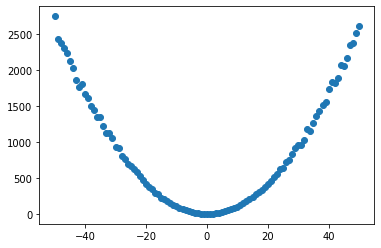

In [12]:
x = np.vstack(np.arange(-50,51,1))
degree = 2
noising_factor = 0.1
y = [xi**degree for xi in x]
y = [ yi + noising_factor * (np.random.rand()*yi) for yi in y]
y=np.array(y, dtype=np.float64)
plt.scatter(x,y)
plt.show()

In [13]:
tr_x, val_x = x[:len(x)-len(x)//5], x[len(x)-len(x)//5:]
tr_y, val_y = y[:len(y)-len(y)//5], y[len(y)-len(y)//5:]
gs = Gridsearch()
gs.set_parameters(
    kernel=["poly", "poly"],
    kparam=[{"degree":2, "gamma":1},{"degree":3, "gamma":1}],
    box=[0.1,1,10],
    eps=[0.05,0.1,0.5],
    optiargs=[{'eps':1e-2, 'maxiter':1e3}, {'eps':5e-3, 'maxiter':1e3}, {'eps':5e-4, 'maxiter':1e3}]
)
best_coarse_model = gs.run(
    tr_x, tr_y, val_x, val_y
)

print("BEST COARSE GRID SEARCH MODEL:",best_coarse_model)

svr = best_coarse_model
kernel, kparam, optiargs, eps, box  = gs.get_model_perturbations(best_coarse_model, 10, 6)
print(kernel, kparam, optiargs)
gs.set_parameters(
    eps=eps,
    box=box,
    kernel=kernel,
    kparam=kparam,
    optiargs=optiargs
)
best_fine_model = gs.run(
    x, y, val_x, val_y
)
print("BEST FINE GRID SEARCH MODEL:", best_fine_model)

svr = best_fine_model
pred = [float(svr.predict(x[i])) for i in range(x.shape[0])]
print("T LOSS:", svr.eps_ins_loss(y, pred))

pred = [float(svr.predict(val_x[i])) for i in range(val_x.shape[0])]
print("V LOSS:", svr.eps_ins_loss(val_y, pred))

(GS - SVR) - Creating models
(GS - SVR) - Fitting 54 models
(GS - SVR) - model 1/54
	(GS - SVR) - Time taken: 1.9060120582580566 - Remaining: 101.018639087677
(GS - SVR) - model 2/54
	(GS - SVR) - Time taken: 4.089982032775879 - Remaining: 106.33953285217285
(GS - SVR) - model 3/54
	(GS - SVR) - Time taken: 6.46001410484314 - Remaining: 109.82023978233339
(GS - SVR) - model 4/54
	(GS - SVR) - Time taken: 8.597012042999268 - Remaining: 107.46265053749084
(GS - SVR) - model 5/54
	(GS - SVR) - Time taken: 10.691013813018799 - Remaining: 104.77193536758423
(GS - SVR) - model 6/54
	(GS - SVR) - Time taken: 12.977018356323242 - Remaining: 103.81614685058594
(GS - SVR) - model 7/54
	(GS - SVR) - Time taken: 15.423012256622314 - Remaining: 103.5545108658927
(GS - SVR) - model 8/54
	(GS - SVR) - Time taken: 17.547013521194458 - Remaining: 100.89532774686813
(GS - SVR) - model 9/54
	(GS - SVR) - Time taken: 19.84101176261902 - Remaining: 99.20505881309509
(GS - SVR) - model 10/54
	(GS - SVR) - T

(GS - SVR) - Fitting 60 models
(GS - SVR) - model 1/60
	(GS - SVR) - Time taken: 3.234999179840088 - Remaining: 190.86495161056519
(GS - SVR) - model 2/60
	(GS - SVR) - Time taken: 6.4539642333984375 - Remaining: 187.1649627685547
(GS - SVR) - model 3/60
	(GS - SVR) - Time taken: 9.897962093353271 - Remaining: 188.06127977371216
(GS - SVR) - model 4/60
	(GS - SVR) - Time taken: 13.176989793777466 - Remaining: 184.47785711288452
(GS - SVR) - model 5/60
	(GS - SVR) - Time taken: 16.319961309432983 - Remaining: 179.51957440376282
(GS - SVR) - model 6/60
	(GS - SVR) - Time taken: 19.44196128845215 - Remaining: 174.97765159606934
(GS - SVR) - model 7/60
	(GS - SVR) - Time taken: 22.641000270843506 - Remaining: 171.42471633638652
(GS - SVR) - model 8/60
	(GS - SVR) - Time taken: 25.81396198272705 - Remaining: 167.79075288772583
(GS - SVR) - model 9/60
	(GS - SVR) - Time taken: 29.128989458084106 - Remaining: 165.06427359580994
(GS - SVR) - model 10/60
	(GS - SVR) - Time taken: 32.32596111297

In [20]:
import time
start = time.time()
svr = SVR("poly", {"degree":degree, "gamma": 1.1244583231992233, 'coef': 0.3773782971534372}, box=10)
svr.fit(x, y, {'eps': 0.009134540664610242, 'maxiter': 1000.0, 'vareps': 0.05}, optim_verbose=False)
print(f"elapsed time {time.time() - start}")

elapsed time 3.311000347137451


b: [2.5953292]
Gamma: 1.1244583231992233 - Box: 10
PREDICTION (INPUT = 12) [[152.17385555]]
LOSS: [87596.44286493]


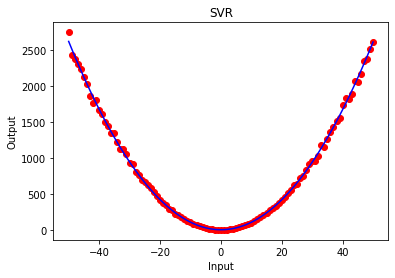

0.9986204159063863

In [21]:
to_predict = 12
pred = svr.predict(to_predict)
print(f"b: {svr.intercept}")
print(f"Gamma: {svr.gamma_value} - Box: {svr.box}")
print(f'PREDICTION (INPUT = {to_predict})', pred)
pred = [float(svr.predict(np.array([x[i]]))) for i in range(x.size)]
print("LOSS:", svr.eps_ins_loss(y, pred))
plt.scatter(x, y , color="red")
plt.plot(x, pred, color="blue")
plt.title('SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()
r2_score(y, pred)

elapsed time 0.8330032825469971
 b: [0.86126411]
Gamma: 1 - Box: 1.0
PREDICTION (INPUT = 12) [151.46611661]


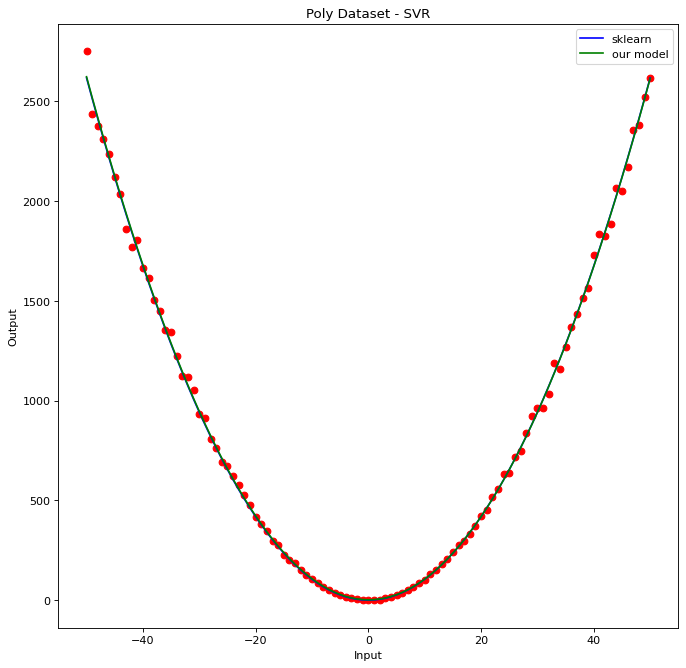

0.9986052830447526

In [41]:
import sklearn.svm as ss
import time
start = time.time()
regressor = ss.SVR(kernel = 'poly', degree=degree, gamma=1, max_iter=5e6)

xs = x
ys = y
regressor.fit(xs, ys.ravel())
print(f"elapsed time {time.time() - start}")
y_pred = regressor.predict(np.array([[to_predict]]))
print(f" b: {regressor.intercept_}")
print(f"Gamma: {regressor.get_params()['gamma']} - Box: {regressor.get_params()['C']}")
print(f'PREDICTION (INPUT = {to_predict})', y_pred)

sklearn_predict = regressor.predict(x)
from matplotlib.pyplot import figure
figure(figsize=(10,10), dpi=80)
plt.scatter(x, y, color = 'red')
plt.plot(x, sklearn_predict, color = 'blue', label='sklearn')
plt.plot(x, pred, color = 'green', label='our model')
plt.title('Poly Dataset - SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()
r2_score(y, sklearn_predict)

In [53]:
print("eps:",regressor.epsilon)
print("b:",regressor.intercept_)
params = regressor.get_params()
print("gamma:",params['gamma'])
print("C:",params['C'])
print("sv:",regressor.support_vectors_)
print("supp index:",regressor.support_)

eps: 0.1
b: [-0.13378878]
gamma: 1
C: 1.0
sv: [[-75.]
 [-74.]
 [-73.]
 [-72.]
 [-71.]
 [-70.]
 [-69.]
 [-68.]
 [-67.]
 [-66.]
 [-65.]
 [-64.]
 [-63.]
 [-62.]
 [-61.]
 [-60.]
 [-59.]
 [-58.]
 [-57.]
 [-56.]
 [-55.]
 [-54.]
 [-53.]
 [-52.]
 [-51.]
 [-50.]
 [-49.]
 [-48.]
 [-47.]
 [-46.]
 [-45.]
 [-44.]
 [-43.]
 [-42.]
 [-41.]
 [-40.]
 [-39.]
 [-38.]
 [-37.]
 [-36.]
 [-35.]
 [-34.]
 [-33.]
 [-32.]
 [-31.]
 [-30.]
 [-29.]
 [-28.]
 [-27.]
 [-26.]
 [-25.]
 [-24.]
 [-23.]
 [-22.]
 [-21.]
 [-20.]
 [-19.]
 [-18.]
 [-17.]
 [-16.]
 [-15.]
 [-14.]
 [-13.]
 [-12.]
 [-11.]
 [-10.]
 [ -9.]
 [ -8.]
 [ -7.]
 [ -5.]
 [ -4.]
 [ -3.]
 [ -2.]
 [ -1.]
 [  0.]
 [  1.]
 [  2.]
 [  3.]
 [  4.]
 [  6.]
 [  7.]
 [  8.]
 [  9.]
 [ 10.]
 [ 11.]
 [ 12.]
 [ 13.]
 [ 14.]
 [ 15.]
 [ 16.]
 [ 17.]
 [ 18.]
 [ 19.]
 [ 20.]
 [ 21.]
 [ 22.]
 [ 23.]
 [ 24.]
 [ 25.]
 [ 26.]
 [ 27.]
 [ 28.]
 [ 29.]
 [ 30.]
 [ 31.]
 [ 32.]
 [ 33.]
 [ 34.]
 [ 35.]
 [ 36.]
 [ 37.]
 [ 38.]
 [ 39.]
 [ 40.]
 [ 41.]
 [ 42.]
 [ 43.]
 [ 44.]
 [ 45.]
 [

In [27]:
regressor.epsilon

0.1

In [44]:
regressor.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 2,
 'epsilon': 0.1,
 'gamma': 1,
 'kernel': 'poly',
 'max_iter': 5000000.0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [43]:
regressor.dual_coef_

array([[ 1.        , -1.        , -1.        , -1.        ,  1.        ,
         1.        ,  1.        , -1.        , -1.        ,  1.        ,
        -1.        ,  1.        , -1.        ,  1.        , -1.        ,
         1.        ,  1.        , -1.        ,  1.        ,  1.        ,
        -1.        ,  1.        , -1.        , -1.        , -1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        -1.        ,  1.        ,  1.        , -1.        ,  1.        ,
        -1.        , -1.        ,  1.        ,  1.        , -1.        ,
         1.        ,  1.        ,  1.        ,  1.        , -1.        ,
        -0.21658419, -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        ,  1.        , -1.        ,  1.        ,
        -1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        , -1.        , -1. 